<a href="https://colab.research.google.com/github/JFaberSFSD/Healthcare_Predictions/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/content/drive/MyDrive/07 - Week 7 (August 1st)/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Let's check for any duplicates quick

In [24]:
df.duplicated().sum()

0

#Let's check for any missing values

In [25]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#Let's check for any outliers or inconsistent values in our columns

In [52]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [27]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [28]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [39]:
df['RestingBP'].describe()

#A resting BP of "0" isn't possible. It appears "0" in this case is just substituting for a missing value. 
#Let's make it truly null, and we can impute this number later in our pipeline!

df['RestingBP'] = df['RestingBP'].replace(0,None)

df['RestingBP'].describe()

#Better!

count    918.000000
mean     132.570806
std       18.012745
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [42]:
df['Cholesterol'].describe()

#Appears we have the same issue here where "0" is being used in place of a null value, we will do the same thing here!

df['Cholesterol'] = df['Cholesterol'].replace(0,None)

df['Cholesterol'].describe()

#Fixed!

count    918.000000
mean     235.759259
std       58.009643
min       85.000000
25%      188.500000
50%      227.500000
75%      269.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [43]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [44]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [45]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [47]:
df['ExerciseAngina'].value_counts()

#This is a simple Yes/No categorical column. Let's switch it over to "0" for No and "1" for Yes as this will help us later!

df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N':0,'Y':1})
df['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

In [49]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [50]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [51]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#That's a good first step for cleaning and preparing our data! Before we dig too deeply into our data, let's run a quick correlation heat map of our numeric columns to see if we can find a good place to start!

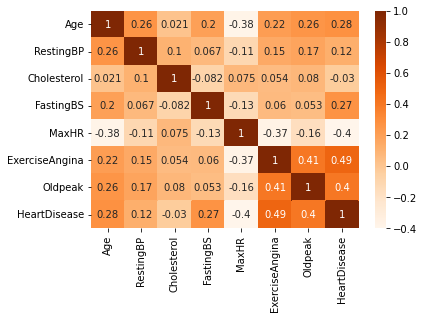

In [53]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges',annot=True)

###Couple of things that stick out to me right away are that we have some positive correlation between ExerciseAngina and our Target (HeartDisease). It's look like there is a minor positive correlation between Age, as well as FastingBS and our Target. Lastly we can see a reasonable negative correlation between MaxHR and our Target. Let's dig a little deeper into these variables to see what we can find!

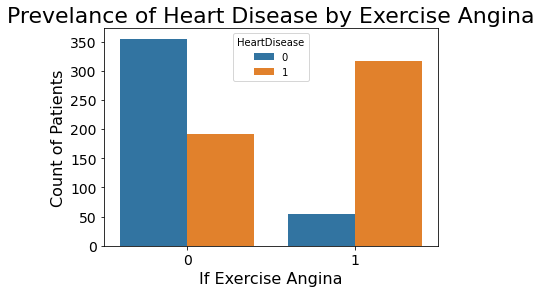

In [71]:
sns.countplot(data = df, x='ExerciseAngina', hue='HeartDisease')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Prevelance of Heart Disease by Exercise Angina',fontsize=22,c='k')
plt.xlabel('If Exercise Angina',fontsize=16)
plt.ylabel('Count of Patients',fontsize=16)


plt.show()

###This is a good visualization to show our positive correlation between Heart Disease and Exercise Angina. Even though we can see that we still have many patients with heart disease that did NOT have exercise angina, we are able to also see that IF a patient has exercise angina, they are MUCH more likely to have heart disease!

Text(0, 0.5, 'Max Heart Rate')

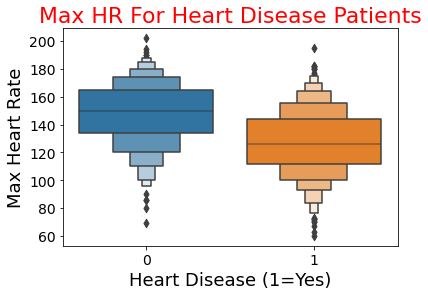

In [75]:
sns.boxenplot(data = df, x ='HeartDisease',y ='MaxHR')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Max HR For Heart Disease Patients',fontsize=22,c='r')
plt.xlabel('Heart Disease (1=Yes)',fontsize=18)
plt.ylabel('Max Heart Rate',fontsize=18)

###Once again, this gives us a nice visualization of the correlation between Max Heart Rate and Heart Disease. There is a very clear negative correlation here, where patients that are positive for Heart Disease have a LOWER MaxHR score!

#Let's sneak one final look at our heatmap!

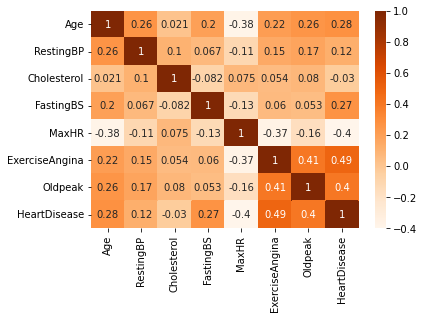

In [76]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges',annot=True)

##What's interesting here, is that we actually have minor to moderate correlation across our entire dataset! Especially when looking at HeartDisease. The only column that doesn't seem to have a reasonable correlation to our target is 'Cholesterol'. For now though, let's keep ALL of our columns for modeling. If we notice poor performance in our models, we can always sneak back and remove a few!